In [1]:
import os
import joblib
import pandas as pd
import numpy as np
import pathlib
import sys

# Mbappe Finishing Profile

In [2]:
#load model
file_path = pathlib.Path('../models/prediction_model_V1.joblib')
if os.path.exists(file_path):
    prediction_model = joblib.load(file_path)

In [3]:
df= pd.read_csv('../data/processed/mbappe_shot_events.csv')
df.shape

(222, 24)

In [4]:
#predict xG
df.columns

Index(['location', 'type_event', 'play_pattern', 'team_name', 'player_name',
       'position_name', '1v1_shot', 'shot_xg', 'shot_end_location',
       'shot_technique', 'body_part', 'shot_type', 'shot_outcome',
       'under_pressure', 'aerial_shot_won', 'first_time_shot',
       'deflected_shot', 'open_goal_shot', 'shot_saved_to_post', 'source',
       'x_coordinate', 'y_coordinate', 'shot_distance', 'shot_angle'],
      dtype='object')

In [5]:
#confirm no missing values
print(df.isna().mean()*100)

#confirm data types
print(f"\n Data types in dataset \n{df.dtypes}")

location              0.0
type_event            0.0
play_pattern          0.0
team_name             0.0
player_name           0.0
position_name         0.0
1v1_shot              0.0
shot_xg               0.0
shot_end_location     0.0
shot_technique        0.0
body_part             0.0
shot_type             0.0
shot_outcome          0.0
under_pressure        0.0
aerial_shot_won       0.0
first_time_shot       0.0
deflected_shot        0.0
open_goal_shot        0.0
shot_saved_to_post    0.0
source                0.0
x_coordinate          0.0
y_coordinate          0.0
shot_distance         0.0
shot_angle            0.0
dtype: float64

 Data types in dataset 
location               object
type_event             object
play_pattern           object
team_name              object
player_name            object
position_name          object
1v1_shot                int64
shot_xg               float64
shot_end_location      object
shot_technique         object
body_part              object
shot_t

In [6]:
df.drop([
    'location','type_event','shot_end_location',
    'x_coordinate','y_coordinate','open_goal_shot','team_name',
    'deflected_shot','source','player_name',
    'position_name','shot_saved_to_post'
            ], 
            axis=1, 
            inplace=True
            )

In [7]:
sys.path.append("C:/Users/On3B3/OneDrive/Documents/Programming_Projects/xG_Model/src")
#import user-defined Class for shot calculations
from helperFunctions import typeToCategory


#categorical features
cat_features =['shot_type','body_part','first_time_shot','1v1_shot',
               'under_pressure','aerial_shot_won',
               'play_pattern','shot_technique'
               ]

X= df.copy() 
#Change to category
X=typeToCategory(X,cat_features)


Data types for categorical features : 
shot_type          category
body_part          category
first_time_shot    category
1v1_shot           category
under_pressure     category
aerial_shot_won    category
play_pattern       category
shot_technique     category
dtype: object


In [8]:
X['shot_type'] = X['shot_type'].cat.rename_categories({'Free Kick': 'set pieces'})

In [9]:
X['shot_type'].value_counts()

shot_type
Open Play     214
Penalty         7
set pieces      1
Name: count, dtype: int64

In [10]:
#creating binary target feature
X['goal'] = X['shot_outcome'].apply(lambda x: 1 if x == "Goal" else 0)
df_x= X.drop(columns=['shot_outcome'], axis=1)

In [11]:
numeric_features= X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print numeric features to verify
print("Numeric features:", numeric_features)


# Get categorical features (non-numeric features)
categorical_features = df_x.select_dtypes(include=['category']).columns.tolist()
print("\nCategorical features:", categorical_features)

features= [f for f in df_x.columns.tolist() if f != 'goal' and f!= 'shot_xg']
print(f"\n All features for modeling:", features)

Numeric features: ['shot_xg', 'shot_distance', 'shot_angle', 'goal']

Categorical features: ['play_pattern', '1v1_shot', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot']

 All features for modeling: ['play_pattern', '1v1_shot', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot', 'shot_distance', 'shot_angle']


['play_pattern', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot', '1v1_shot', 'shot_distance', 'shot_angle']

In [12]:
predicted_xG=prediction_model.predict_proba(df_x)[:,1].round(2)


In [13]:
print(len(predicted_xG))

222


In [14]:
mbappe_actual_goals=df_x['goal'].sum()
mbappe_sum_xG= predicted_xG.sum()
mbappe_actual_xg = X['shot_xg'].sum()
print(f"\nMbappe's actual goals: {mbappe_actual_goals}")
print(f"\nMbappe's total xG: {mbappe_sum_xG}")
print(f"\nMbappe's actual xG: {mbappe_actual_xg:.2f}")

mbappe_performance= mbappe_actual_goals - mbappe_sum_xG
mbappe_actual_performance = mbappe_actual_goals - mbappe_actual_xg
print(f"\nMbappe's performance (Goals - xG): {mbappe_performance:.2f}")
print(f"\nMbappe's actual performance (Goals - xG): {mbappe_actual_performance:.2f}")


Mbappe's actual goals: 49

Mbappe's total xG: 29.48

Mbappe's actual xG: 38.52

Mbappe's performance (Goals - xG): 19.52

Mbappe's actual performance (Goals - xG): 10.48


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
predicted_xG

array([0.16, 0.16, 0.06, 0.02, 0.15, 0.05, 0.63, 0.03, 0.09, 0.1 , 0.14,
       0.31, 0.1 , 0.08, 0.62, 0.09, 0.34, 0.02, 0.12, 0.07, 0.11, 0.26,
       0.08, 0.05, 0.12, 0.1 , 0.03, 0.07, 0.06, 0.06, 0.03, 0.08, 0.22,
       0.03, 0.03, 0.1 , 0.19, 0.2 , 0.09, 0.04, 0.07, 0.05, 0.1 , 0.08,
       0.13, 0.02, 0.04, 0.2 , 0.06, 0.07, 0.06, 0.03, 0.17, 0.18, 0.19,
       0.11, 0.07, 0.11, 0.06, 0.39, 0.12, 0.2 , 0.22, 0.19, 0.04, 0.19,
       0.08, 0.03, 0.26, 0.03, 0.05, 0.02, 0.06, 0.09, 0.15, 0.11, 0.15,
       0.32, 0.13, 0.23, 0.15, 0.16, 0.62, 0.14, 0.14, 0.08, 0.03, 0.14,
       0.02, 0.12, 0.21, 0.05, 0.05, 0.05, 0.63, 0.01, 0.09, 0.04, 0.16,
       0.11, 0.22, 0.18, 0.1 , 0.1 , 0.2 , 0.07, 0.08, 0.03, 0.18, 0.12,
       0.06, 0.03, 0.07, 0.06, 0.19, 0.08, 0.15, 0.13, 0.51, 0.05, 0.08,
       0.04, 0.49, 0.09, 0.17, 0.08, 0.08, 0.1 , 0.06, 0.08, 0.06, 0.17,
       0.1 , 0.05, 0.04, 0.08, 0.14, 0.08, 0.16, 0.11, 0.21, 0.1 , 0.12,
       0.05, 0.04, 0.17, 0.63, 0.1 , 0.2 , 0.15, 0.

In [17]:
d= {'shot_xg': X['shot_xg'],
       'predicted_xG':predicted_xG,
        'goal': X['goal'] }
df_check = pd.DataFrame(d)

df_check.head()

,shot_xg,predicted_xG,goal
0,0.192033,0.16,1
1,0.440553,0.16,1
2,0.098494,0.06,0
3,0.007248,0.02,0
4,0.158645,0.15,0


In [18]:
import matplotlib.pyplot as plt

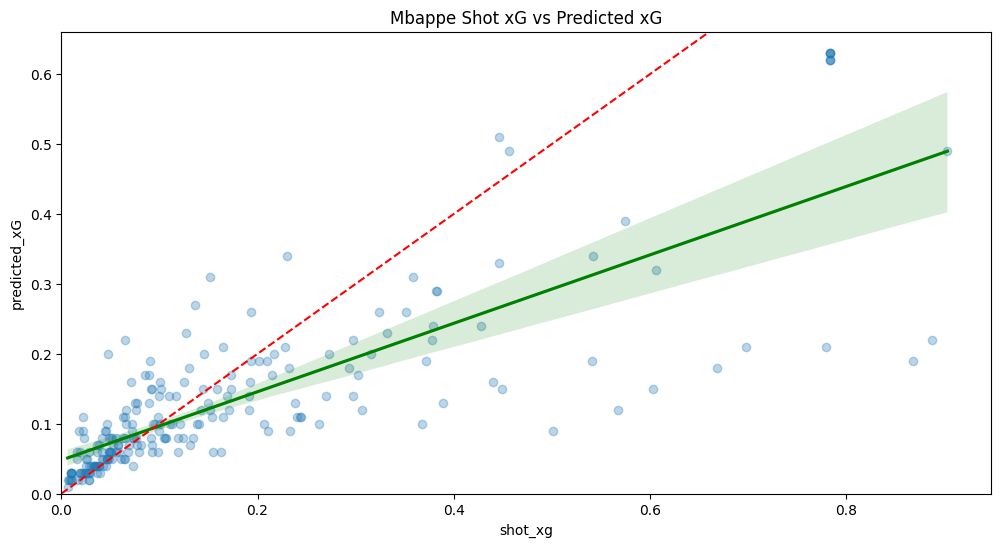

In [19]:
plt.figure(figsize=(12, 6))
y=sns.regplot(data=df_check, x='shot_xg', y= 'predicted_xG', line_kws={'color':'green','label':'Best Fit Line'}, scatter_kws={'alpha':0.3})
y.set_xlim(0)
y.set_ylim(0)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x')
plt.title('Mbappe Shot xG vs Predicted xG')
plt.show()

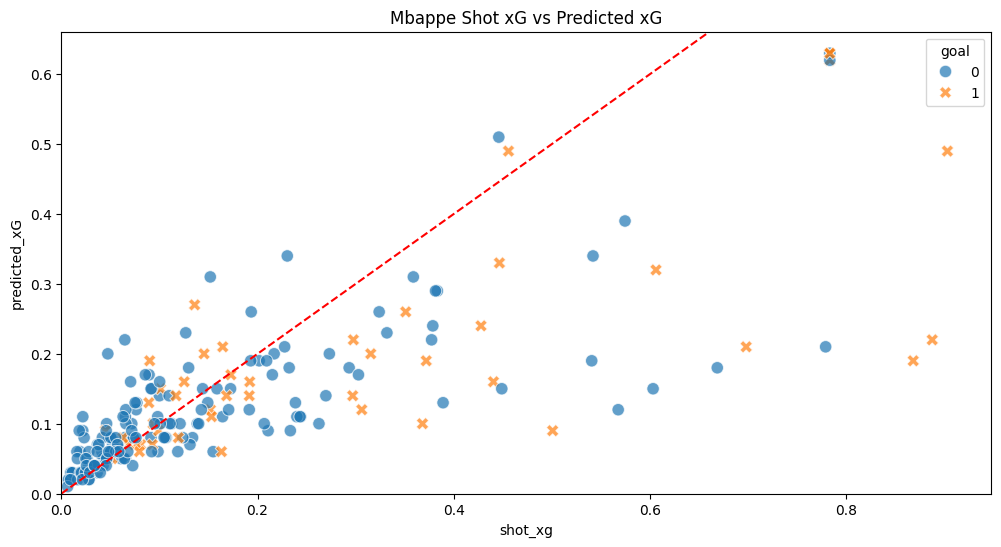

In [20]:
plt.figure(figsize=(12, 6))
y=sns.scatterplot(data=df_check,
                  x='shot_xg',
                  y= 'predicted_xG',
                  style='goal',
                  alpha=0.7,
                  hue='goal',
                  s=80
                  )
y.set_xlim(0)
y.set_ylim(0)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x')
plt.title('Mbappe Shot xG vs Predicted xG')
plt.show()

# Messi Finishing Profile

In [21]:
#load model
# file_path = pathlib.Path('../models/prediction_model_V1.joblib')
# if os.path.exists(file_path):
#     prediction_model = joblib.load(file_path)

In [22]:
df_messi= pd.read_csv('../data/processed/messi_shot_events.csv')
df_messi.shape

(218, 24)

In [23]:
df_messi.drop([
    'location','type_event','shot_end_location',
    'x_coordinate','y_coordinate','open_goal_shot','team_name',
    'deflected_shot','source','player_name',
    'position_name','shot_saved_to_post'
            ], 
            axis=1, 
            inplace=True
            )

In [24]:

#categorical features
cat_features_m =['shot_type','body_part','first_time_shot','1v1_shot',
               'under_pressure','aerial_shot_won',
               'play_pattern','shot_technique'
               ]

M= df_messi.copy() 
#Change to category
M=typeToCategory(M,cat_features_m)


Data types for categorical features : 
shot_type          category
body_part          category
first_time_shot    category
1v1_shot           category
under_pressure     category
aerial_shot_won    category
play_pattern       category
shot_technique     category
dtype: object


In [25]:
M['shot_type'] = M['shot_type'].cat.rename_categories({'Free Kick': 'set pieces'})

In [26]:
#creating binary target feature
M['goal'] = M['shot_outcome'].apply(lambda x: 1 if x == "Goal" else 0)
df_m= M.drop(columns=['shot_outcome'], axis=1)

In [27]:
numeric_features= M.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print numeric features to verify
print("Numeric features:", numeric_features)


# Get categorical features (non-numeric features)
categorical_features = df_m.select_dtypes(include=['category']).columns.tolist()
print("\nCategorical features:", categorical_features)

features= [f for f in df_m.columns.tolist() if f != 'goal' and f!= 'shot_xg']
print(f"\n All features for modeling:", features)

Numeric features: ['shot_xg', 'shot_distance', 'shot_angle', 'goal']

Categorical features: ['play_pattern', '1v1_shot', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot']

 All features for modeling: ['play_pattern', '1v1_shot', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot', 'shot_distance', 'shot_angle']


In [28]:
predicted_xG_m=prediction_model.predict_proba(df_m)[:,1].round(2)


In [29]:
messi_actual_goals=df_m['goal'].sum()
messi_sum_xG= predicted_xG_m.sum()
messi_actual_xg = M['shot_xg'].sum()
print(f"\nMessi's actual goals: {messi_actual_goals}")
print(f"\nMessi's total xG: {messi_sum_xG:.2f}")
print(f"\nMessi's actual xG: {messi_actual_xg:.2f}")

messi_performance= messi_actual_goals - messi_sum_xG
messi_actual_performance = messi_actual_goals - messi_actual_xg
print(f"\nMessi's performance (Goals - xG): {messi_performance:.2f}")
print(f"\nMessi's actual performance (Goals - xG): {messi_actual_performance:.2f}")


Messi's actual goals: 22

Messi's total xG: 24.19

Messi's actual xG: 23.13

Messi's performance (Goals - xG): -2.19

Messi's actual performance (Goals - xG): -1.13


In [30]:
messi_dict= {'shot_xg': M['shot_xg'],
       'predicted_xG':predicted_xG_m,
        'goal': M['goal'] }
messi_df = pd.DataFrame(messi_dict)

messi_df.head()

,shot_xg,predicted_xG,goal
0,0.044275,0.06,0
1,0.049324,0.09,0
2,0.050865,0.07,0
3,0.080826,0.10,0
4,0.198835,0.10,1


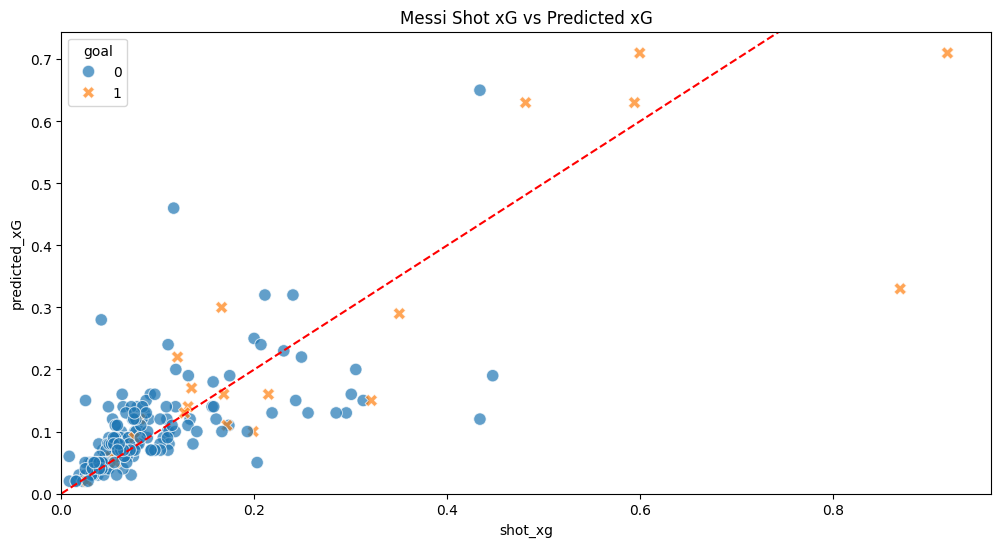

In [31]:
plt.figure(figsize=(12, 6))
y=sns.scatterplot(data=messi_df,
                  x='shot_xg',
                  y= 'predicted_xG',
                  style='goal',
                  alpha=0.7,
                  hue='goal',
                  s=80
                  )
y.set_xlim(0)
y.set_ylim(0)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x')
plt.title('Messi Shot xG vs Predicted xG')
plt.show()

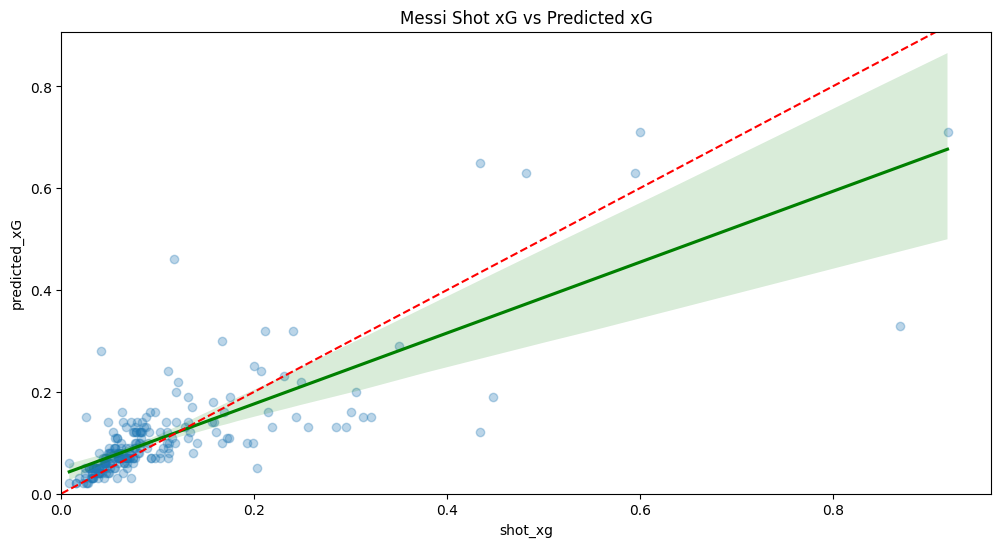

In [32]:
plt.figure(figsize=(12, 6))
y=sns.regplot(data=messi_df,
              x='shot_xg',
              y= 'predicted_xG',
              line_kws={'color':'green','label':'Best Fit Line'},
              scatter_kws={'alpha':0.3})
y.set_xlim(0)
y.set_ylim(0)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x')
plt.title('Messi Shot xG vs Predicted xG')
plt.show()